<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 15 **
** ┗ Marketing Campaign Response Customer Prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Campaign Response Rate Analysis」
* 🥈Session 2 -「Customer Characteristics of Marketing Response」
* 🥇Session 3 -「Market Marketing Reaction Customer Prediction」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/15_Marketing Campaign Response Prediction')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/15_Marketing Campaign Response Prediction'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🎫 (marketer, service planner, promotion/budget manager)

``
Mart A is doing customer marketing on various channels online and offline.As I operated MASS marketing for both channels, marketing costs are excessive.
It occurs.In order to reduce marketing costs, we want to carry out target marketing for customers who have high marketing reactions.

``


> ** Looking at the data **

* Marketing campaign related data
* Data specification ⬇

| ID | Year_birth | Education | Marital_status | Income | Kidhome |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Customer ID | Born year | Education level | Marriage | Import | Children's name |
| TEENHOME | dt_customer | Recency | mntwines | mntfruits | mntmeatproducts |
| Youth Name | Customer Registration Date | From the last date of purchase | The last two years wine is available | The last two -year fruits |
| Mntfishproducts | mntsweetproducts | mntgoldprods | NumdealSpurchases | Numwebpurchases | Numcatalogpurchases |
| Recent 2 years of fish -resume | Recent 2 -year confectionery volume | Recent 2 years Jewelry Purchases | Number of discounts | Number of online purchases | Catalog usage number |
| Numstorepurchases | NumwebvisitsMonth | Acceptedcmp3 | Acceptedcmp4 | Acceptedcmp5 |
| Number of offline purchases | Monthly website visits | 3rd campaign reaction | 4th campaign reaction | 5th campaign reaction | The first campaign response |
| Acceptedcmp2 | Complain | Z_CostContact | Z_revenue | Response |
| 2nd campaign response | Whether or not you complain | Customer contact cost | Marketing revenue | final marketing reaction |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter15_marketing_campaign.csv', sep=';')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Excessive marketing costs due to online/offline target mass marketing
``

> ** Expected effect **

``
▶ Reduction of marketing costs with target marketing
``

> ** Solution **

``
▶ Target marketing through marketing reaction potential modeling
▶ Session 1 🥉
-DATA pretreatment and customer registration date, pre -processing of time data, campaign response rate analysis
▶ Session 2 🥈
-Analysis of campaign response rate by number of numeric and categorical variables
▶ Session 3 🥇
-ML algorithms use campaigns with high potential for customer prediction
``

> ** Performance measurement **

``
▶ Response rate for target marketing before/after marketing costs
``

> ** Public application **

``
▶ Create data Mart for input to Model every month
▶ Marketing available parameters using Model every month
▶ Setting the experimental group / control group and performing marketing rate GAP verification
``

> ** Main code preview **

``
▶ Session 1 → Apply (Lambda X: (DF ['DT_CUSTOMER']. Max () -x) .days
▶ Session 2 → Groupby.agg
▶ Session 3 → Labelencoder, LightGBM, ROC_CURVE
``


## ** 🥉Session 1 **
** ┗ Campaign response rate analysis **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ It consists of 2,240 row, 29 cola
print('df', df.shape)

df (2240, 29)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
df['Income'].mean()

np.float64(52247.25135379061)

In [ ]:
# ▶ NULL value, average value substitution, income data, problem when processing 0
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [ ]:
# ▶ Null value reappearance
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [ ]:
# ▶ Confirmation of negative values ​​outlier
## rows 500
pd.set_option('display.max_rows', 500)

## columns
pd.set_option('display.max_columns', 500)

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### · customer registration date (dt_customer) pretreatment
---
* COL that cannot be used on a simple date
* Use it with a continuous variable for how many days has passed.


In [ ]:
import datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].min(), df['Dt_Customer'].max()

(Timestamp('2012-07-30 00:00:00'), Timestamp('2014-06-29 00:00:00'))

In [ ]:
# ▶ Last day of customer registration date -Customer registration date> Public date after registering
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x : (df['Dt_Customer'].max() - x).days)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,139,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,161,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### · Campaign response rate analysis
---


In [ ]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,139,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,161,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# ▶ Campaign response rate analysis
df['Response'].value_counts()

,count
Response,
0,1906
1,334


In [ ]:
# ▶ Average 14% response rate
334 / (334 + 1906)

0.14910714285714285

In [ ]:
# ▶ Analysis of past campaign reactions and campaign response rates
df_mkt = df[['AcceptedCmp5', 'AcceptedCmp4', 'AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'Response']]
df_mkt.head(5)

,AcceptedCmp5,AcceptedCmp4,AcceptedCmp3,AcceptedCmp2,AcceptedCmp1,Response
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [ ]:
# ▶ Define the new column as a new COL
df_mkt['cmp_sum'] = df_mkt['AcceptedCmp5'] + df_mkt['AcceptedCmp4'] + df_mkt['AcceptedCmp3'] + df_mkt['AcceptedCmp2'] + df_mkt['AcceptedCmp1']
df_mkt.head(10)

,AcceptedCmp5,AcceptedCmp4,AcceptedCmp3,AcceptedCmp2,AcceptedCmp1,Response,cmp_sum
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0
9,0,0,1,0,0,0,1


In [ ]:
# ▶ The more customers who have responded to the campaign in the past, the higher the next campaign response rate (※ Very critical variable)
df_mkt_gp = df_mkt.groupby('cmp_sum')['Response'].agg(['count','sum'])
df_mkt_gp['ratio'] = round((df_mkt_gp['sum'] / df_mkt_gp['count']) * 100, 1)
df_mkt_gp

,count,sum,ratio
cmp_sum,,,
0,1777,146,8.2
1,325,101,31.1
2,83,42,50.6
3,44,35,79.5
4,11,10,90.9


## ** 🥈Session 2 **
** ┗ Customer characteristics according to marketing reaction **
---



In [ ]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,139,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,161,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# ▶ Numeric, Categorical Value Sharing
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['Education', 'Marital_Status']
numeric_list : ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


### · Numeric variable
---


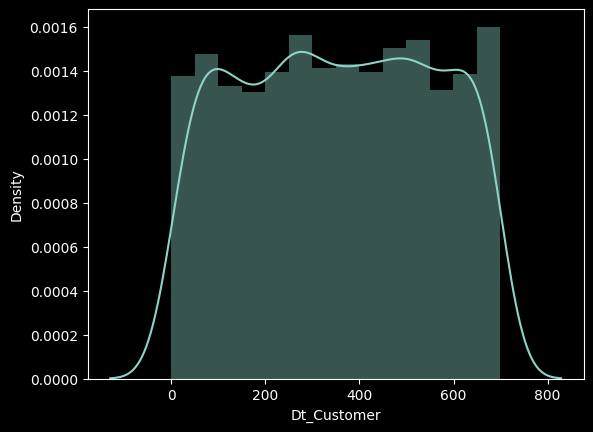

In [ ]:
# ▶ Customer Registration Date (DT_CUSTOMER) confirmation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Dt_Customer']);

In [ ]:
# ▶ Sectionization
import numpy as np
df['Dt_Customer_gp'] = np.where (df['Dt_Customer'] <= 200, 1,
                           np.where(df['Dt_Customer'] <= 500, 2, 3))

df[['Dt_Customer','Dt_Customer_gp']]

,Dt_Customer,Dt_Customer_gp
0,663,3
1,113,1
2,312,2
3,139,1
4,161,1
...,...,...
2235,381,2
2236,19,1
2237,155,1
2238,156,1


In [ ]:
# ▶ Simply express using AGG FUNCATION
df_gp = df.groupby('Dt_Customer_gp')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Dt_Customer_gp,,,
1,618,52,8.4
2,980,121,12.3
3,642,161,25.1


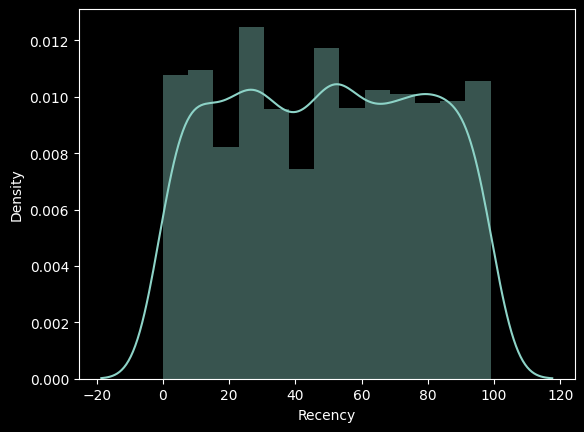

In [ ]:
# ▶ Check the distribution distribution from the last purchase date
sns.distplot(df['Recency']);

In [ ]:
# ▶ Sectionization
import numpy as np
df['Recency_gp'] = np.where (df['Recency'] <= 35, 1,
                           np.where(df['Dt_Customer'] <= 65, 2, 3))

df[['Recency','Recency_gp']]

,Recency,Recency_gp
0,58,3
1,38,3
2,26,1
3,26,1
4,94,3
...,...,...
2235,46,3
2236,56,2
2237,91,3
2238,8,1


In [ ]:
# ▶ Simply express using AGG FUNCATION
df_gp = df.groupby('Recency_gp')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Recency_gp,,,
1,820,190,23.2
2,131,5,3.8
3,1289,139,10.8


In [ ]:
# ▶ Kidhome analysis
df_gp = df.groupby('Kidhome')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Kidhome,,,
0,1293,222,17.2
1,899,110,12.2
2,48,2,4.2


### · categorical variable
---


In [ ]:
print("categoical_list :", categoical_list)

categoical_list : ['Education', 'Marital_Status']


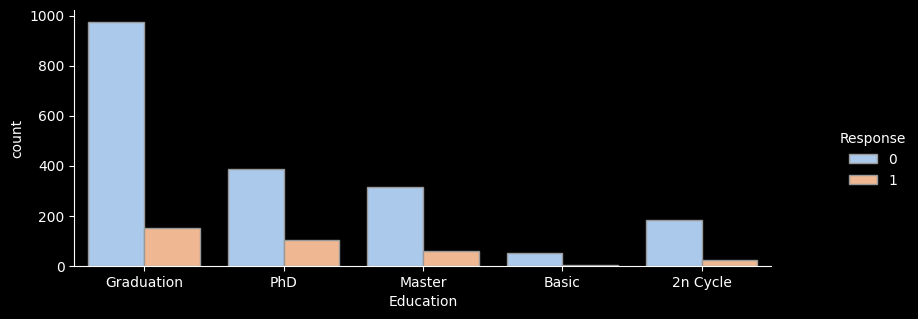

In [ ]:
# ▶ Campaign response rate according to the level of education
sns.catplot(x="Education", hue="Response", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [ ]:
df_gp = df.groupby('Education')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp.sort_values(by=['ratio'],ascending = False)

,count,sum,ratio
Education,,,
PhD,486,101,20.8
Master,370,57,15.4
Graduation,1127,152,13.5
2n Cycle,203,22,10.8
Basic,54,2,3.7


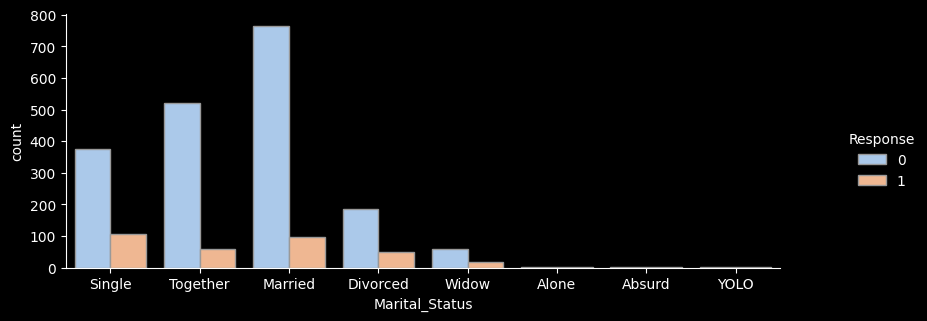

In [ ]:
# ▶ Analysis of campaign response rate according to marriage
sns.catplot(x="Marital_Status", hue="Response", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [ ]:
df_gp = df.groupby('Marital_Status')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp.sort_values(by=['ratio'],ascending = False)

,count,sum,ratio
Marital_Status,,,
Absurd,2,1,50.0
YOLO,2,1,50.0
Alone,3,1,33.3
Widow,77,19,24.7
Single,480,106,22.1
Divorced,232,48,20.7
Married,864,98,11.3
Together,580,60,10.3


In [ ]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_gp,Recency_gp
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3,3
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1,3
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2,1


In [ ]:
# ▶ Create a new derivative variable (1)
df['cmp_sum'] = df['AcceptedCmp5'] + df['AcceptedCmp4'] + df['AcceptedCmp3'] + df['AcceptedCmp2'] + df['AcceptedCmp1']
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_gp,Recency_gp,cmp_sum
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3,3,0
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1,3,0


## ** 🥇Session 3 **
** ┗ ML Use Marketing Reaction Customer Prediction **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_gp,Recency_gp,cmp_sum
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3,3,0
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1,3,0
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2,1,0
3,6182,1984,Graduation,Together,26646.0,1,0,139,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,1,0
4,5324,1981,PhD,Married,58293.0,1,0,161,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,3,0


In [ ]:
# ▶ Create a new derivative variable (2)
df['mnt_sum'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_gp,Recency_gp,cmp_sum,mnt_sum
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3,3,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1,3,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2,1,0,776


In [ ]:
# ▶ Steps to distinguish between Fearue (x) and Y data for learning modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['ID', 'Response', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer_gp', 'Recency_gp'], axis=1)
Y=df['Response']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1568, 27)
(1568,)
(672, 27)
(672,)


In [ ]:
print(categoical_list)

['Education', 'Marital_Status']


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

Education
Marital_Status


In [ ]:
x_test[categoical_list].head(5)

,Education,Marital_Status
74,2,3
566,2,4
1253,2,3
552,4,4
21,2,3


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
import lightgbm as lgb
# ▶ setting the parameters

d_train = lgb.Dataset (x_train, label = y_train)

params = {}
params [ 'learning_rate'] = 0.1
params [ 'boosting_type'] = 'gbdt' # GradientBoostingDecisionTree
params ['objective'] = 'binary'
params [ 'metric' ] = 'binary_logloss' # metric for multi-class
params [ 'max_depth'] = 2
params [ 'num_leaves' ] = 4
params ['seed'] = 23456
# ▶ Learning
clf = lgb.train (params, d_train, 500) # Model training at 500 EPOCS


[LightGBM] [Info] Number of positive: 234, number of negative: 1334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2020
[LightGBM] [Info] Number of data points in the train set: 1568, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149235 -> initscore=-1.740616
[LightGBM] [Info] Start training from score -1.740616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(x_train)
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

y_pred_test = clf.predict(x_test)
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.5:       # setting threshold to .5
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0



print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1334
           1       0.99      0.86      0.92       234

    accuracy                           0.98      1568
   macro avg       0.98      0.93      0.95      1568
weighted avg       0.98      0.98      0.98      1568

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       572
           1       0.71      0.50      0.59       100

    accuracy                           0.90       672
   macro avg       0.82      0.73      0.76       672
weighted avg       0.89      0.90      0.89       672



In [ ]:
pd.Series(y_pred_test).value_counts()

,count
0.0,602
1.0,70


In [ ]:
# ▶ Suitable issues, the maximum performance of train and test sets prevents overpacking.
from sklearn.metrics import roc_auc_score

y_pred_train_proba = clf.predict(x_train)
y_pred_test_proba = clf.predict(x_test)


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9982476710362768
roc_score_test : 0.8867132867132869


In [ ]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # ▶ Returns the FPR and TPR value according to the lamp value.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ▶ Picture ROC CURVE with a Plot curve.
    plt.plot(fprs , tprs, label='ROC')
    # ▶ Picture diagonal straight lines in the middle.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # ▶ Change the scale of the FPR X axis to 0.1 units
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

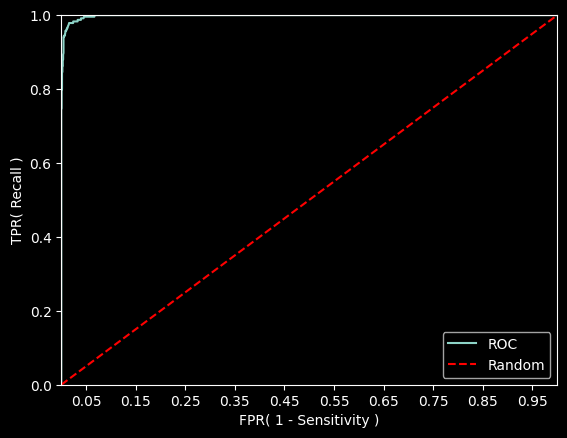

In [ ]:
roc_curve_plot(y_train, y_pred_train_proba)

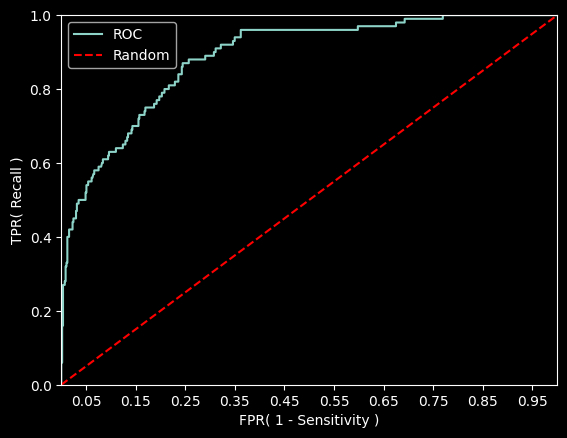

In [ ]:
roc_curve_plot(y_test, y_pred_test_proba)

### · Identify important variables
---
* Finding important variables through feature IMP analysis


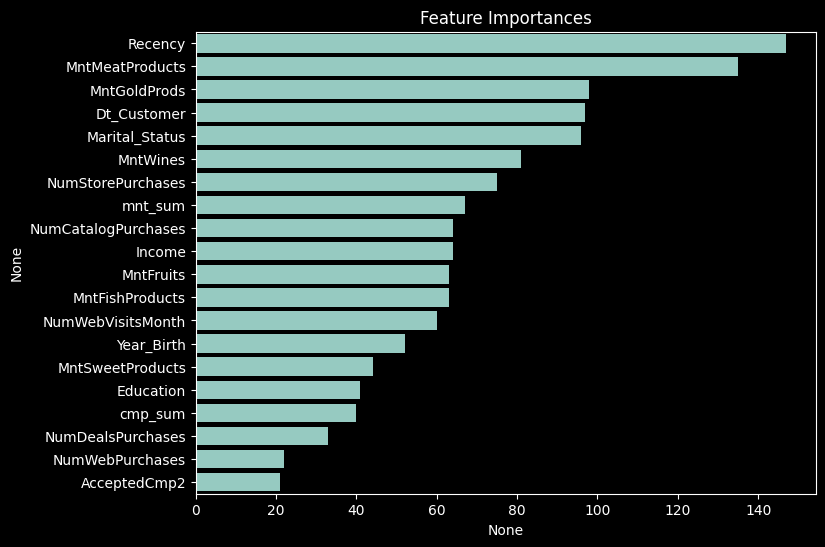

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = clf.feature_importance() # Randomforest : feature_importance_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Dt_Customer_gp', 'Recency_gp', 'cmp_sum', 'mnt_sum'],
      dtype='object')

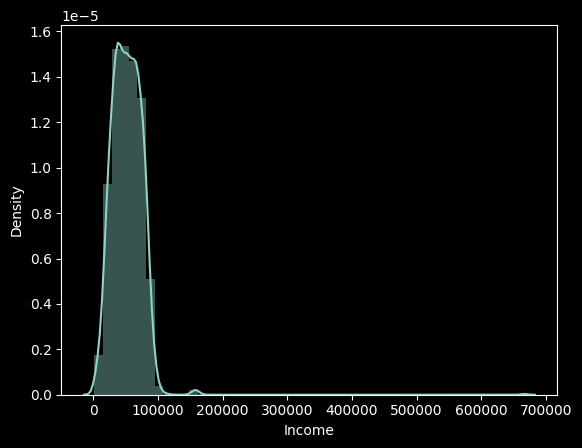

In [ ]:
# ▶ distplot
sns.distplot(df['Income']);

In [ ]:
# ▶ Variable interpretation quickly
import numpy as np

val = 'Income'
sp1 = 30000
sp2 = 60000

# ------------------------------------------------------------

df['gp'] = np.where (df[val] <= sp1, 1,
                           np.where(df[val] <= sp2, 2, 3))

df_gp = df.groupby('gp')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp.sort_values(by=['ratio'], ascending = False)

,count,sum,ratio
gp,,,
3,841,181,21.5
2,1029,114,11.1
1,370,39,10.5


### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(clf)

# Model READ
clf_from_pickle = pickle.loads(saved_model)